![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [41]:
# Utilizaremos las siguientes librerías para el análisis
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [10]:
beers = pd.read_csv('data/datasets_beers.csv')
beers.info()
beers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [11]:
# Eliminar una columna (por ejemplo, la columna "B")
beers = beers.drop(columns=["Unnamed: 0"])
beers

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [13]:
beers.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [14]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [15]:
beers.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [17]:
# Contar cuántas cervezas hay de cada estilo
conteo_estilos = beers["style"].value_counts()

print(conteo_estilos)

style
American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
                                 ... 
Wheat Ale                           1
Grisette                            1
Flanders Oud Bruin                  1
Braggot                             1
Low Alcohol Beer                    1
Name: count, Length: 99, dtype: int64


## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [20]:
beers_20_40= beers.iloc[10:20,:]
beers_20_40

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [25]:
beers_20_40_2= beers_20_40.loc[:,"name":"ounces"]
beers_20_40_2

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [28]:
# Seleccionar las columnas y los registros deseados
beers_20_40_2_3 = beers_20_40.loc[10:20, ["abv", "ibu", "ounces"]]

# Imprimir el resultado
print(beers_20_40_2_3)

      abv   ibu  ounces
10  0.072   NaN    12.0
11  0.073   NaN    12.0
12  0.069   NaN    12.0
13  0.085   NaN    12.0
14  0.061  60.0    12.0
15  0.060   NaN    12.0
16  0.060   NaN    12.0
17  0.060   NaN    12.0
18  0.060   NaN    12.0
19  0.082   NaN    12.0


In [29]:
# Convertir a un array de numpy
numpy_array = beers_20_40_2_3.to_numpy()

print(numpy_array)

[[ 0.072    nan 12.   ]
 [ 0.073    nan 12.   ]
 [ 0.069    nan 12.   ]
 [ 0.085    nan 12.   ]
 [ 0.061 60.    12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.06     nan 12.   ]
 [ 0.082    nan 12.   ]]


## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [30]:
beers["ounces"].sum()

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [31]:
beers["ibu"].mean()

np.float64(42.71316725978647)

In [32]:
beers["ibu"].max()

np.float64(138.0)

In [33]:
beers["ibu"].min()

np.float64(4.0)

In [35]:
# Encontrar la fila con el amargor máximo
indice_max = beers["ibu"].idxmax()
cerveza_max_amargor = beers.loc[indice_max]
cerveza_max_amargor

abv                                    0.082
ibu                                    138.0
id                                       980
name               Bitter Bitch Imperial IPA
style         American Double / Imperial IPA
brewery_id                               374
ounces                                  12.0
Name: 147, dtype: object

In [37]:
# Encontrar la fila con el amargor máximo
indice_min = beers["ibu"].idxmin()
cerveza_min_amargor = beers.loc[indice_min]
cerveza_min_amargor

abv                     0.056
ibu                       4.0
id                       1350
name          Summer Solstice
style               Cream Ale
brewery_id                171
ounces                   12.0
Name: 106, dtype: object

## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [38]:
beers["ibu"].std()

np.float64(25.954065911259317)

In [39]:
beers["ibu"].median()

np.float64(35.0)

La medida de la ibu es poco dispersa atendiendo a su mediana y su desviacion

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

Columnas numéricas:
        abv   ibu    id  brewery_id  ounces
0     0.050   NaN  1436         408    12.0
1     0.066   NaN  2265         177    12.0
2     0.071   NaN  2264         177    12.0
3     0.090   NaN  2263         177    12.0
4     0.075   NaN  2262         177    12.0
...     ...   ...   ...         ...     ...
2405  0.067  45.0   928         424    12.0
2406  0.052   NaN   807         424    12.0
2407  0.055   NaN   620         424    12.0
2408  0.055  40.0   145         424    12.0
2409  0.052   NaN    84         424    12.0

[2410 rows x 5 columns]


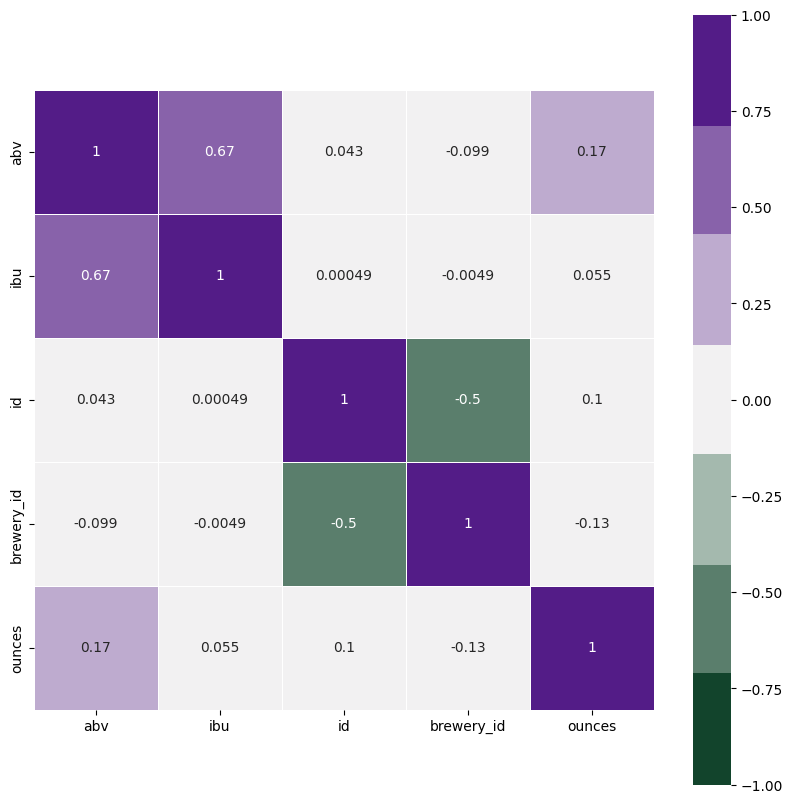

In [44]:
# Seleccionar solo las columnas numéricas
numericas = beers.select_dtypes(include=["number"])
print("Columnas numéricas:")
print(numericas)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(numericas.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);

Hay una correlacion entre el IBU y el ABV

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<Axes: xlabel='abv', ylabel='Count'>

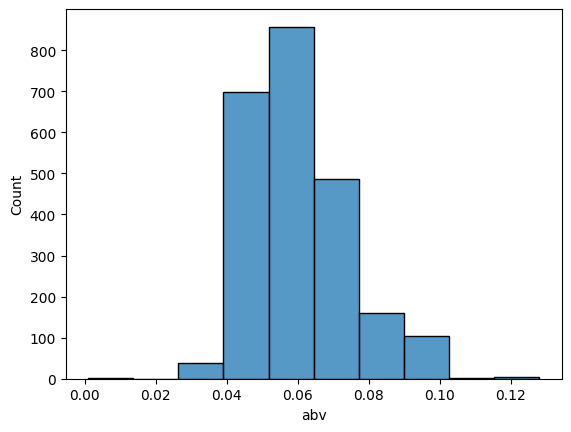

In [45]:

sns.histplot(beers["abv"], bins = 10)

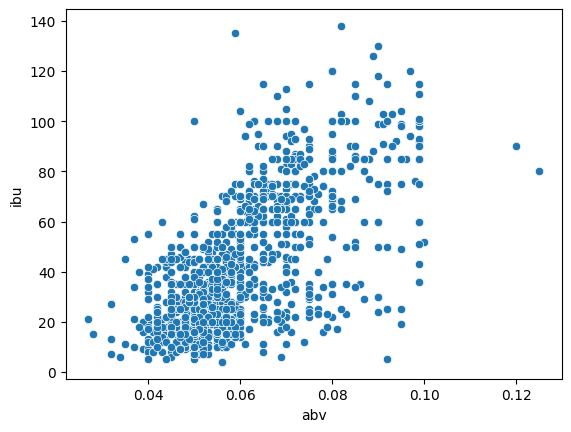

In [46]:
sns.scatterplot(x = beers["abv"], y = beers["ibu"]);

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

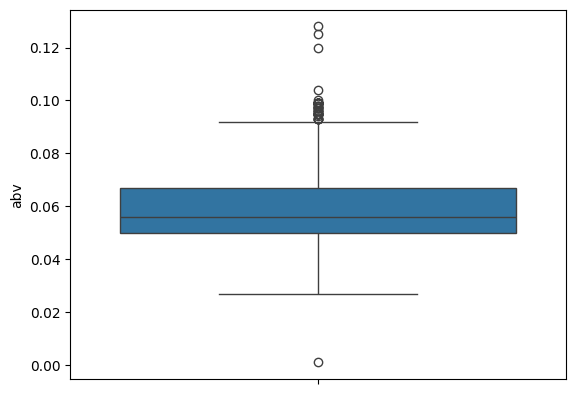

In [47]:
sns.boxplot(beers["abv"]);

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [49]:
# Calcular el ABV promedio por estilo
abv_promedio = beers.groupby("style")["abv"].mean()

# Ordenar de mayor a menor
abv_promedio = abv_promedio.sort_values(ascending=False)

print(abv_promedio)

style
English Barleywine        0.107667
Quadrupel (Quad)          0.104000
American Barleywine       0.099000
American Malt Liquor      0.099000
Russian Imperial Stout    0.097636
                            ...   
Berliner Weissbier        0.043909
English Dark Mild Ale     0.041500
Light Lager               0.040417
Radler                    0.040333
Low Alcohol Beer          0.001000
Name: abv, Length: 99, dtype: float64


In [50]:
# Calcular el ibu promedio por estilo
abv_promedio_2 = beers.groupby("style")["ibu"].mean()

# Ordenar de mayor a menor
abv_promedio_2 = abv_promedio_2.sort_values(ascending=False)

print(abv_promedio_2)

style
American Barleywine                   96.00
American Double / Imperial IPA        93.32
Russian Imperial Stout                86.50
American Double / Imperial Pilsner    85.00
Belgian Strong Dark Ale               72.00
                                      ...  
Kristalweizen                           NaN
Low Alcohol Beer                        NaN
Mead                                    NaN
Rauchbier                               NaN
Shandy                                  NaN
Name: ibu, Length: 99, dtype: float64


## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [51]:
breweries = pd.read_csv('data/datasets_breweries.csv')
breweries.info()
breweries.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  558 non-null    int64 
 1   name        558 non-null    object
 2   city        558 non-null    object
 3   state       558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


,Unnamed: 0
count,558.000000
mean,278.500000
std,161.224998
min,0.000000
25%,139.250000
50%,278.500000
75%,417.750000
max,557.000000


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [54]:
# Renombrar una columna
breweries = breweries.rename(columns={"Unnamed: 0": "brewery_id"})

breweries

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


## Ejercicio 18
Junta los dos datasets que tienes

In [56]:
df_combinado_merge = pd.merge(beers, breweries, on="brewery_id")
df_combinado_merge

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [98]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [104]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total